<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [318]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [319]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_1.csv')

In [320]:
df_train.shape

(11033, 63)

[**Python**] - Mostrar as primeiras 5 linhas:

In [ ]:
df_train.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,1,0.015101,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.003945,0.0,0.000138,0.003355,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,9,0.005996,0.019476,0.124770,0.000000,0.010487,0.0,0.029214,0.046445,0.000000,0.018198,0.0,0.138620,0.003186,0.0,0.003121,0.003355,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0125,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,9,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.0,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.138620,0.000438,0.0,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1785,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,1,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.0,0.003121,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


### Pré-processamento e transformação dos dados

[**Python**] - Construir coluna 'sexo' da seguinte forma:
* Se Gender= 'Male' ==> sexo= 1;
* Se Gender= 'Female' ==> sexo= 0.

In [ ]:
def define_label(row):
    if row['Gender'] == 'Male':
        return 1
    else:
        return 0

In [ ]:
df_sexo['sexo'] = df_sexo.apply(lambda row: define_label(row), axis = 1)
df_sexo.head()

[**Python**] - Renomear ou reescrever os nomes das colunas do dataframe em letras minúsculas:

In [ ]:
df_sexo = df_sexo.drop(columns= 'Gender', axis= 1)
df_sexo = df_sexo.rename({'Height': 'altura', 'Weight': 'peso'}, axis= 1)
df_sexo.head()

[**Python**] - Definir os arrays df_X e df_y:




In [464]:
df_X = df_train.copy()
df_X = df_X.drop(columns= ['target','id'])
df_y = df_train['target'].values

In [465]:
df_y

array([ True, False, False, ...,  True, False,  True])

[**Python**] - Normalizar os dados - StandardScaler()

In [466]:
col_num = df_X.select_dtypes(include=['float64']).columns
col_num

Index(['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10',
       'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02', 'ind03',
       'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09', 'ind10', 'ind11',
       'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19',
       'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
       'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35',
       'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [467]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
#MM = MinMaxScaler()

df_X[col_num]= SS.fit_transform(df_X[col_num])
df_X

,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,86,1,2.001376,0.242357,-0.596385,-0.430638,0.152674,0.0,0.428471,-0.709793,-0.461886,-0.002502,0.0,-0.628558,2.134258,0.0,-0.556589,2.165120,0.0,-0.328086,-0.735539,-0.806095,-0.842409,-0.839243,-0.707050,-0.804816,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,0.673623,-1.556934,-1.247419,-1.215785,-0.764612,-0.751150,0.805421,-1.303257,-1.119314,0.0,0.0,0.0,-0.701970,-0.760228,0.0,-0.975378,0.0,0.607337,0.716694,0.0,0.0,0.0,0.0,0.0,0.0
1,18,9,0.387480,1.172213,1.430105,-0.760142,1.986368,0.0,1.579348,1.770106,-0.797393,2.028365,0.0,2.076478,1.566392,0.0,1.965044,2.165120,0.0,-0.664310,1.392895,0.117190,0.092460,0.655920,-0.689384,-0.787562,0.0,0.0,0.0,1.750520,-0.400652,0.0,0.0,0.0,0.0,0.0,-1.540288,0.136321,0.996572,1.033080,-0.429099,-0.080470,-0.638652,-0.309639,-0.815049,0.0,0.0,0.0,1.424563,-0.760228,0.0,1.025244,0.0,0.607337,-1.395295,0.0,0.0,0.0,0.0,0.0,0.0
2,74,9,-0.674382,-0.702598,-0.734921,-0.528354,-0.089710,0.0,-0.777622,-0.809962,-0.566046,-0.212122,0.0,-0.813056,-0.805176,0.0,-0.631284,-0.618950,0.0,-0.664310,1.392895,1.409612,1.386654,1.276154,-0.707050,-0.804816,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,0.673623,0.663728,0.996572,1.033080,1.583274,1.596347,-0.638652,1.033231,1.121589,0.0,0.0,0.0,1.424563,1.315395,0.0,1.025244,0.0,0.607337,0.716694,0.0,0.0,0.0,0.0,0.0,0.0
3,49,4,-0.673864,0.612231,0.775288,-0.760142,-0.664660,0.0,0.263588,0.359384,-0.797393,-0.677702,0.0,2.076478,-0.488625,0.0,-0.637674,-0.702649,0.0,-0.664310,-0.735539,-0.806095,-0.842409,-0.839243,-0.170321,-0.280608,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,-1.540288,0.663728,-0.686421,-0.653569,1.387696,1.400801,2.002404,-0.980833,-0.953238,0.0,0.0,0.0,-0.701970,-0.760228,0.0,-0.975378,0.0,-1.646532,0.716694,0.0,0.0,0.0,0.0,0.0,0.0
4,47,1,-0.641563,-0.573651,-0.598885,-0.645889,-0.381256,0.0,-0.494469,-0.453383,0.080827,1.089695,0.0,-0.503635,0.623162,0.0,1.965044,-0.167845,0.0,-0.664310,-0.735539,-0.806095,-0.842409,-0.839243,1.617460,1.465467,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,-1.540288,-1.556934,-1.247419,-1.215785,-0.764612,-0.751150,-0.638652,-1.383742,-1.368303,0.0,0.0,0.0,-0.701970,-0.760228,0.0,-0.975378,0.0,-1.646532,-1.395295,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,23,6,-0.675408,-0.894229,-0.831276,-0.760142,-0.480291,0.0,-0.875267,-0.861664,-0.797393,-0.447745,0.0,-0.655869,-0.530496,0.0,-0.372914,-0.440151,0.0,1.827455,1.392895,1.409612,1.386654,-0.839243,-0.707050,-0.804816,0.0,0.0,0.0,-0.573635,0.285076,0.0,0.0,0.0,0.0,0.0,0.673623,-1.556934,0.996572,1.033080,1.583274,1.596347,-0.638652,1.033231,-0.953238,0.0,0.0,0.0,1.424563,-0.760228,0.0,1.025244,0.0,0.607337,-1.395295,0.0,0.0,0.0,0.0,0.0,0.0
11029,49,7,-0.674898,0.867246,1.073491,-0.145372,0.860279,0.0,0.465534,0.575905,0.113706,1.155862,0.0,2.076478,-0.077472,0.0,0.196508,1.189576,0.0,-0.664310,-0.735539,-0.806095,-0.842409,-0.839243,-0.707050,-0.804816,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,-1.540288,-1.556934,0.622499,-0.091353,-0.764612,-0.751150,1.210827,0.831897,-0.953238,0.0,0.0,0.0,-0.701970,-0.760228,0.0,-0.975378,0.0,-1.646532,-1.395295,0.0,0.0,0.0,0.0,0.0,0.0
11030,47,8,-0.674640,-0.897531,-0.833592,-0.760142,-0.664660,0.0,-0.900448,-0.888663,-0.797393,-0.677702,0.0,-0.685125,-0.595402,0.0,-0.328911,-0.457480,0.0,1.827455,1.392895,1.409612,1.386654,1.276154,-0.707050,-0.804816,0.0,0.0,0.0,-0.573635,-0.596183,0.0,0.0,0.0,0.0,0.0,0.673623,0.66

In [468]:
df_X.drop(columns=['cnae2','rf2','md6','md11','mc2','ind01','ind09','ind10','ind11','ind14','ind15','ind16','ind17','ind18','ind28','ind29','ind30','ind38','ind39','ind40','ind41','ind42','ind43'], inplace=True)

In [434]:
df_X.shape

(11033, 47)

In [463]:
df_X['ind43'].value_counts()

0.0    11033
Name: ind43, dtype: int64

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [469]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 38); X: Teste=  (1104, 38)


In [470]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [582]:
# Número de Neurônios na Input Layer:
N_I = 38

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 65

N_H2 = 65

N_H3=130

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [583]:
np.random.seed(22091980)
tf.random.set_seed(19800922)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [584]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
#RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
#RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 65)                2535      
_________________________________________________________________
dropout_164 (Dropout)        (None, 65)                0         
_________________________________________________________________
dense_248 (Dense)            (None, 65)                4290      
_________________________________________________________________
dropout_165 (Dropout)        (None, 65)                0         
_________________________________________________________________
dense_249 (Dense)            (None, 1)                 66        
Total params: 6,891
Trainable params: 6,891
Non-trainable params: 0
_________________________________________________________________
None


### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [585]:

#Algoritmo_Opt = tf.keras.optimizers.Adam()
Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07
                                        , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [586]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1697 - binary_accuracy: 0.7641 - val_loss: 0.1565 - val_binary_accuracy: 0.7808
Epoch 2/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1629 - binary_accuracy: 0.7687 - val_loss: 0.1554 - val_binary_accuracy: 0.7808
Epoch 3/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1612 - binary_accuracy: 0.7702 - val_loss: 0.1598 - val_binary_accuracy: 0.7826
Epoch 4/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1609 - binary_accuracy: 0.7689 - val_loss: 0.1572 - val_binary_accuracy: 0.7772
Epoch 5/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1604 - binary_accuracy: 0.7691 - val_loss: 0.1612 - val_binary_accuracy: 0.7817
Epoch 6/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1603 - binary_accuracy: 0.7697 - val_loss: 0.1555 - val_binary_accuracy: 0.7808
Epoch 7/100
311/311 [==============================] - 0s 

In [ ]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [587]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 970us/step - loss: 0.1561 - binary_accuracy: 0.7835


[0.15608319640159607, 0.7835144996643066]

In [ ]:
#hist2 = RN.fit(df_X, df_y, epochs = 200, callbacks = callbacks)

In [588]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 946us/step - loss: 0.1564 - binary_accuracy: 0.7742


[0.15642964839935303, 0.7742227911949158]

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


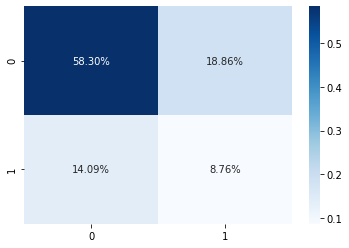

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [611]:
df_XOR.shape

(11033, 11033)

In [589]:
y_pred = RN.predict_classes(df_X)
y_pred = y_pred.astype('bool')
df_y_pred = pd.DataFrame(y_pred.reshape(-1,1))

In [590]:
df_df_y = pd.DataFrame(df_y.reshape(-1,1))

In [610]:
df_XOR = pd.DataFrame(df_y ^ y_pred)

In [607]:
resul = pd.concat([df_y_pred,df_df_y,df_XOR],axis = 1)
resul

TypeError: ignored

In [593]:
dif =1 - df_XOR.sum()/len(df_y)
dif

0   -2709.659204
dtype: float64

In [ ]:
df_test = pd.read_csv('/test_1.csv')

In [ ]:
X_teste = df_test.drop(columns = ['id'], axis = 1)

In [ ]:
df_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,6,0.015101,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.0,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,8,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.003945,0.0,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0125,0.36075,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,9,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.0,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,9,0.015101,0.028263,0.129650,0.028248,0.005284,0.0,0.036084,0.050898,0.040644,0.004436,0.0,0.138620,0.003389,0.0,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.0125,0.19260,0.0,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.1785,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,3,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.0,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_teste = RN.predict_classes(X_teste)

df_submit = pd.DataFrame(zip(df_test['id'],y_teste), columns = ['id','target'])

df_submit.to_csv('/PyLadies_NL.csv',index = False, sep = ',')

In [ ]:
df_submit['target'].value_counts()

0    794
1    206
Name: target, dtype: int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.